In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
df = pd.read_csv("../../datasets/bank/bank.csv",sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
df.shape

(4119, 21)

In [4]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [5]:
df["y"] = (df["y"]=="yes").astype(int)

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [7]:
df["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [8]:
df["education"] = np.where(df["education"]=="basic.4y", "Basic",df["education"])
df["education"] = np.where(df["education"]=="basic.6y", "Basic",df["education"])
df["education"] = np.where(df["education"]=="basic.9y", "Basic",df["education"])
df["education"] = np.where(df["education"]=="high.school", "High School",df["education"])
df["education"] = np.where(df["education"]=="university.degree", "University Degree",df["education"])
df["education"] = np.where(df["education"]=="professional.course", "Professional Course",df["education"])
df["education"] = np.where(df["education"]=="illiterate", "Illiterate",df["education"])

In [9]:
df["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'unknown', 'Illiterate'], dtype=object)

In [10]:
df["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [11]:
df.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [12]:
df.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0,0.5,u'Frequency')

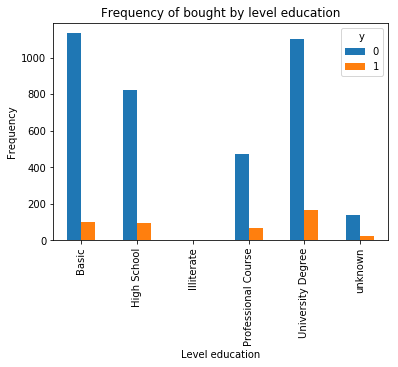

In [13]:
pd.crosstab(df.education,df.y).plot(kind="bar")
plt.title("Frequency of bought by level education")
plt.xlabel("Level education")
plt.ylabel("Frequency")

In [14]:
np.count_nonzero(df["education"] == "Illiterate")

1

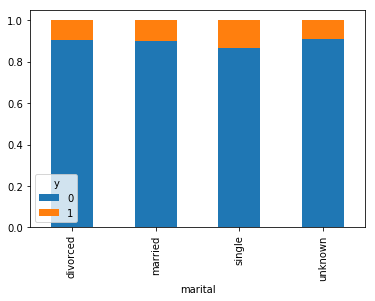

In [15]:
table = pd.crosstab(df.marital,df.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

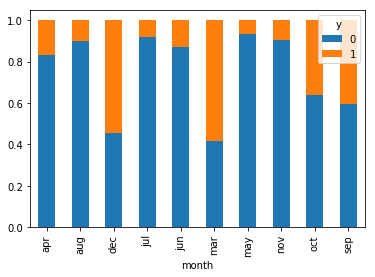

In [16]:
table_mont = pd.crosstab(df.month,df.y)
table_mont.div(table_mont.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True)

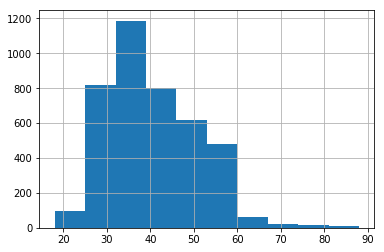

In [17]:
df.age.hist()

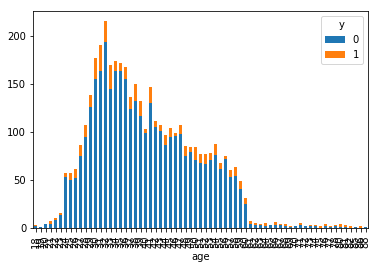

In [18]:
pd.crosstab(df.age,df.y).plot(kind="bar",stacked=True)

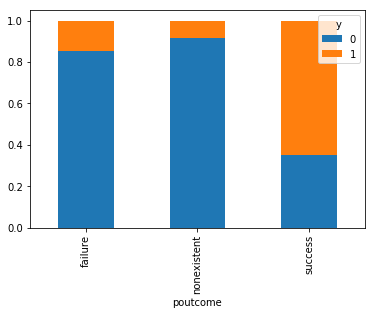

In [19]:
table = pd.crosstab(df.poutcome,df.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind="bar", stacked=True)

In [20]:
pd.crosstab(df.poutcome,df.y)

y,0,1
poutcome,,
failure,387,67
nonexistent,3231,292
success,50,92


### Convert categorical values to dummies

In [21]:
categories = ["job","marital","education","default","housing","loan",
             "contact","month","day_of_week","poutcome"]

In [22]:
for category in categories:
    category_list = "cat" + "_" + category
    category_dummies = pd.get_dummies(df[category],prefix=category)
    df = df.join(category_dummies)

In [23]:
df_vars = df.columns.values.tolist()

In [24]:
to_keep = [v for v in df_vars if v not in categories]

In [25]:
df = df[to_keep]
df.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [26]:
df.shape

(4119, 62)

In [27]:
Y = df["y"]
X = df.drop("y",1)
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0


In [28]:
df_vars = X.columns.values

### Select the variables

In [29]:
n = 12
lr = LogisticRegression()
rfe = RFE(lr,n)
rfe.fit(X,Y)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=12, step=1, verbose=0)

In [30]:
rfe.support_

array([False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True, False,  True, False, False,
       False, False, False, False,  True, False,  True])

In [31]:
print(rfe.ranking_)

[34 43 18 45  1 14 27 25  1 40 22  3  1 36  2 38  1  5 30 32 12 47 19 44
 31 50 26 13 48 21 41  8 35 33 49 20  6 10 15  9 23 16  4 39 24  1  1  1
  1  1 17  1 46 37 28 42 29 11  1  7  1]


In [32]:
z = list(zip(rfe.ranking_,df_vars))

In [33]:
z.sort()

In [34]:
final_vars = []
for i in z:
    if i[0] == 1:
        final_vars.append(i[1])
final_vars

['euribor3m',
 'job_entrepreneur',
 'job_self-employed',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_oct',
 'poutcome_failure',
 'poutcome_success',
 'previous']

In [35]:
X = df[final_vars]
Y = df["y"]

### Create the model with statsmodel.api

In [36]:
import statsmodels.api as sm
logistic_model = sm.Logit(Y,X)

/Users/Ivan/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [37]:
result = logistic_model.fit()

Optimization terminated successfully.
         Current function value: 0.279180
         Iterations 7


In [38]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:                Logit            No. Iterations:   7.0000   
Dependent Variable:   y                Pseudo R-squared: 0.192    
Date:                 2018-07-15 15:20 AIC:              2323.8813
No. Observations:     4119             BIC:              2399.7617
Df Model:             11               Log-Likelihood:   -1149.9  
Df Residuals:         4107             LL-Null:          -1422.9  
Converged:            1.0000           Scale:            1.0000   
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
euribor3m         -0.6253   0.0265 -23.6151 0.0000 -0.6772 -0.5734
job_entrepreneur  -0.4842   0.3817  -1.2685 0.2046 -1.2323  0.2639
job_self-employed -0.4626   0.3275  -1.4125 0.1578 -1.1046  0.1793
month_dec          0.7147   0.4662   1.5331 0.1253 -0.1990  1.6284
month_jul          0.3280   0.1842   1.7808 0.0750 -0.0330  0.6889
month_jun          0.3431   0.1689   2.0310 0.0423  0.0120  0.6741
month_mar          1.0612   0.3152   3.3666 0.0008  0.4434  1.6789
month_may         -1.0490   0.1264  -8.3016 0.0000 -1.2967 -0.8014
month_oct          0.0707   0.2699   0.2621 0.7932 -0.4583  0.5997
poutcome_failure  -1.0450   0.2453  -4.2601 0.0000 -1.5257 -0.5642
poutcome_success   0.7788   0.2888   2.6967 0.0070  0.2128  1.3449
previous           0.3493   0.1411   2.4750 0.0133  0.0727  0.6258
==================================================================

"""

### Create the model with skikit-learn

In [40]:
logistic_model = LogisticRegression()
logistic_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [41]:
logistic_model.score(X,Y)

0.9021607186210245

In [42]:
1 - Y.mean()

0.8905074047098811

In [43]:
pd.DataFrame(list(zip(X.columns, np.transpose(logistic_model.coef_))))

,0,1
0,euribor3m,[-0.5027490723867721]
1,job_entrepreneur,[-0.34306615620122966]
2,job_self-employed,[-0.33506416262967775]
3,month_dec,[0.8733167977559423]
4,month_jul,[0.38208745237398717]
5,month_jun,[0.5096949804529265]
6,month_mar,[1.270361229993388]
7,month_may,[-0.7430896328703274]
8,month_oct,[0.4118557475456737]
9,poutcome_failure,[-0.7531618665773608]


### Validate the model

In [44]:
from sklearn.cross_validation import train_test_split

/Users/Ivan/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

In [47]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
probs = logistic_model.predict_proba(X_test)
probs

array([[0.77571016, 0.22428984],
       [0.82049445, 0.17950555],
       [0.92936862, 0.07063138],
       ...,
       [0.63525956, 0.36474044],
       [0.93753969, 0.06246031],
       [0.92936862, 0.07063138]])

In [49]:
predictions = logistic_model.predict(X_test)

In [50]:
from IPython.display import display,Math,Latex

In [51]:
display(Math(r"\varepsilon\in (0,1), Y_p = \begin{cases}0& si\ p\leq \varepsilon\\1&si\ p>\varepsilon\end{cases}"))

<IPython.core.display.Math object>

In [52]:
probs = probs[:,1]

In [53]:
probs_df = pd.DataFrame(probs)
threshold = 0.1
probs_df["prediction"] = np.where(probs_df[0] > threshold,1,0)
probs_df.head()

,0,prediction
0,0.224290,1
1,0.179506,1
2,0.070631,0
3,0.021418,0
4,0.232200,1


In [54]:
pd.crosstab(probs_df.prediction,columns="count")

col_0,count
prediction,
0,879
1,357


In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(Y_test,predictions)

0.901294498381877

## Cross validation

In [57]:
from sklearn.cross_validation import cross_val_score

In [59]:
scores = cross_val_score(LogisticRegression(),X,Y,scoring="accuracy",cv=200)

In [60]:
np.mean(scores)

0.9017997835497834

## Confusion matrix and ROC curve

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)

In [64]:
lm = LogisticRegression()
lm.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
lm.score(X_test,Y_test)

0.8980582524271845

In [83]:
probs = lm.predict_proba(X_test)

In [84]:
prob = probs[:,1]

In [85]:
probs_df = pd.DataFrame(prob)

In [159]:
thresholds = [i for i in np.arange(0.03,0.6,0.01)]
sensitivities = [1]
true_specificities= [1]
for threshold in thresholds:
    probs_df["prediction"] = np.where(probs_df[0] > threshold,1,0)
    probs_df["actual"] = list(Y_test)
    confusion_matrix = pd.crosstab(probs_df.prediction,probs_df.actual)
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    sens = float(TP)/float((TP + FN))
    sensitivities.append(sens)
    espc = float(TN)/float((TN + FP))
    true_espc = 1 - espc
    true_specificities.append(true_espc)
sensitivities.append(0)
true_specificities.append(0)

Text(0.5,1,u'ROC curve')

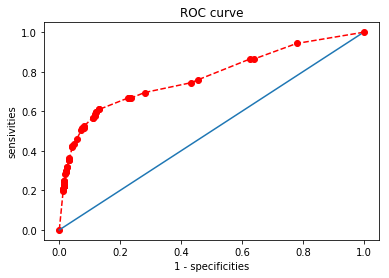

In [160]:
plt.plot(true_specificities,sensitivities,marker="o",linestyle="--",color="r")
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1 - specificities")
plt.ylabel("sensivities")
plt.title("ROC curve")

## ROC curve with sklearn and ggplot

In [169]:
from sklearn import metrics
from ggplot import *

In [165]:
true_specificities,sensitivities,_ = metrics.roc_curve(Y_test, prob)

In [166]:
df = pd.DataFrame({
    "x":true_specificities,
    "y":sensitivities   
})

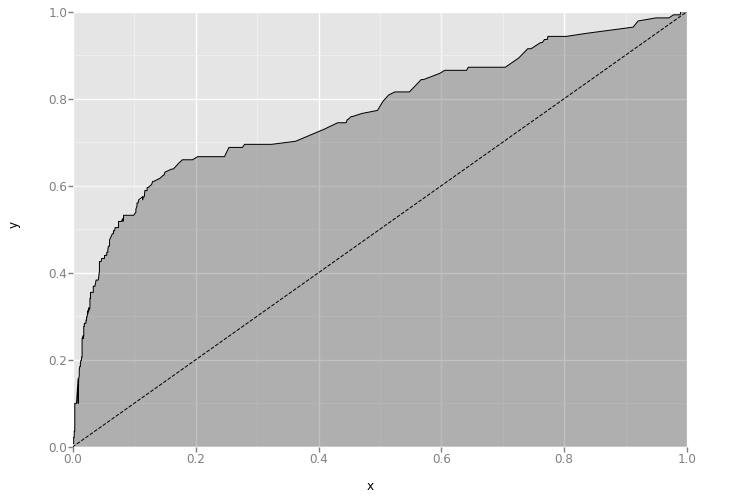

<ggplot: (275207377)>

In [179]:
ggplot(df,aes(x="x", y="y")) + geom_line() + geom_abline(linetype="dashed") + xlim(0,1) + ylim(0,1) + geom_area(alpha=0.3)

In [172]:
auc = metrics.auc(true_specificities,sensitivities)
auc

0.7698209138896985

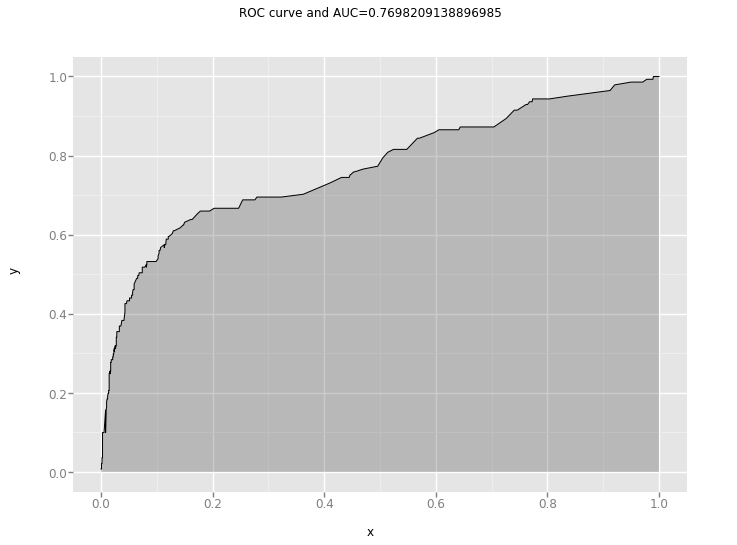

<ggplot: (275347205)>

In [181]:
ggplot(df,aes(x="x",y="y")) + geom_area(alpha=0.25) + geom_line(aes(y="y")) + ggtitle("ROC curve and AUC=%s" % str(auc))